In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## 1. Load the data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/mp-rocha/data-projects/master/heart-disease-predict/heart-disease-predict/heart.csv")
df = data.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 2. Data preparation and Feature Engeneering

In [0]:
# Checking for missing data

print(data.isnull().sum())
print('\n No missing data')

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 No missing data


In [0]:
# Converting Age in class

# 0 - (25-40)
# 1 - (41-50)
# 2 - (51-60)
# 3 - (61-80)

# Defining intervals
age_bins = [0, 40, 50, 60, 120]
age_bins_label = [0, 1, 2, 3]

# Converting numerical variabel "Age" in a categorical variable
df["age"] = pd.cut(df['age'], age_bins, labels=age_bins_label, include_lowest=True)

# Converting "trestbps" in class

# 0 - (90-120)
# 1 - (121-150)
# 2 - (151-200)

# Defining intervals
trestbps_bins = [90, 120, 150, 200]
trestbps_label = [0, 1, 2]

# Converting numerical variable "trestbps" in categorical variable
df['trestbps'] = pd.cut(df['trestbps'], trestbps_bins, labels=trestbps_label, include_lowest=True)

# Converting "chol" in class

# 0 - (0-250)
# 1 - (250-600)

# Defing intervals
chol_bins = [0, 250, 600]
chol_label = [0, 1]

# Converting 'chol' in category variable
df['chol'] = pd.cut(df['chol'], chol_bins, labels=chol_label, include_lowest=True)

# Converting "thalach" in class

# 0 - (80-130)
# 1 - (131-160)
# 2 - (161-210)

# Defing intervals
thalach_bins = [80, 130, 160, 210]
thalach_label = [0, 1, 2]

# Converting 'thalach' in category variable
df['thalach'] = pd.cut(df['thalach'], thalach_bins, labels=thalach_label, include_lowest=True)

# Converting "oldpeak" in class

# 0 - (0-1)
# 1 - (1-2)
# 2 - (2-6)

# Defing intervals
oldpeak_bins = [0, 1, 2, 6]
oldpeak_label = [0, 1, 2]

# Converting 'chol' in category variable
df['oldpeak'] = pd.cut(df['oldpeak'], oldpeak_bins, labels=oldpeak_label, include_lowest=True)

In [0]:
# Using One Hot Encoding to transform in a sparse matrix

df_dummies = pd.get_dummies(df)

In [0]:
# Drop this columns
df_dummies.drop(labels=["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"], axis=1)

,target,age_0,age_1,age_2,age_3,trestbps_0,trestbps_1,trestbps_2,chol_0,chol_1,thalach_0,thalach_1,thalach_2,oldpeak_0,oldpeak_1,oldpeak_2
0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1
1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
2,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
3,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
4,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0
299,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
300,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1
301,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0


 ## 3. Simple exploratory analysis

#### Any question that are necessary to answer

> ##### 1. Who has more heart disease men or women?
> ##### 2. Number of people with heart disease?
> ##### 3. How old is the diagnosis of heart disease most often?
> ##### 4. People without heart disease can raise heart rate?
> ##### 5. People with> 120mg blood sugar higher chances of heart disease?
> ##### 6. Are people with high cholesterol prone to heart disease?
> ##### 7. Which type of chest pain is more frequently when the people is sick?



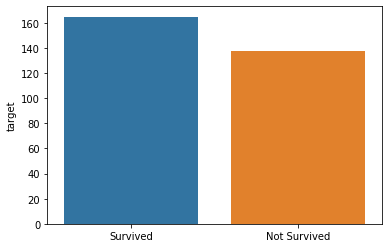

In [0]:
# Checking numbers of "Not Survived" (1) and "Survived" (0)

n_target = data["target"].value_counts()

fig, ax = plt.subplots()
sns.barplot(x=["Survived", "Not Survived"], y=n_target)

Text(0.5, 1.0, 'Proportion Male x Female')

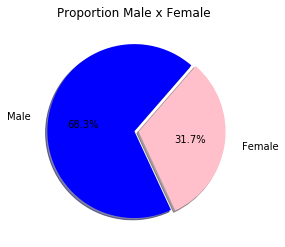

In [0]:
# Proportion of males and females

n_sex = data["sex"].value_counts()
sizes = list(n_sex.values)
fig, ax = plt.subplots()
ax.pie(n_sex, labels= ["Male", "Female"], colors=["blue", "pink"], shadow=True, labeldistance=1.2, autopct='%1.1f%%', explode=(0, 0.05), startangle=49)
plt.title("Proportion Male x Female")

In [0]:
print(pd.crosstab(data.sex, data.target))

target    0   1
sex            
0        24  72
1       114  93


## 4. Data modeling + Tuning parameters

In [3]:
# Defining variables and split data

y = data["target"]
X = data.drop(labels=["target"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Data dimension
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


In [0]:
# pip install 'grid search'

!pip install scikit-optimize

     |████████████████████████████████| 81kB 2.6MB/s 


In [0]:
# Create a function to train a model that will be used like parameters in 'tuning parameter method'

def treinar_modelo(params):
  max_leaf_nodes = params[0]
  n_estimators = params[1]
  max_depth = params[2]

  rf = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes, n_estimators = n_estimators, max_depth=max_depth)
  rf.fit(X_train, y_train)
  predict_rf = rf.predict_proba(X_test)[:,1]
  
  return -roc_auc_score(y_test, predict_rf)

In [0]:
# Import the library to tuning parameters
from skopt import dummy_minimize 

# Dummy minimize will be use to find parameters at randomly from a sample
space = [(2, 145), (50, 1000), (50, 1000)]
resultado_random = dummy_minimize(treinar_modelo, dimensions=space, random_state=42, verbose=0)

# Best parameters
print(resultado_random.x)

# Score of the best model
print(resultado_random.fun)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


[16, 239, 736]
-0.9407327586206896


In [0]:
rf2 = RandomForestClassifier(max_leaf_nodes = 16, n_estimators = 239, max_depth=736)
rf2.fit(X_train, y_train)
predict_rf2 = rf2.predict(X_test)

print(accuracy_score(y_test, predict_rf2))
print(rf2.feature_importances_)
print(sum(rf2.feature_importances_))

mask = rf2.feature_importances_ > 0.012
X_reduced = len(X_train.loc[:, mask].columns)
print(X_reduced)

0.7704918032786885
[0.08201156 0.04919803 0.11934096 0.06552988 0.06524521 0.01041067
 0.01902203 0.09912827 0.09892632 0.13062476 0.06026604 0.12049942
 0.07979685]
1.0
10


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.feature_selection import RFE

RFE_Rf = RFE(estimator = RandomForestClassifier(), n_features_to_select=X_reduced, step=20, verbose=1)

RFE_Rf.fit(X_train, y_train)
pred_RFERf = RFE_Rf.predict(X_test)

print(accuracy_score(y_test, pred_RFERf))

Fitting estimator with 13 features.
10
0.8688524590163934


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.linear_model import LogisticRegression
data_scaler = data.copy()

log = LogisticRegression()
log.fit(X_train, y_train)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data_scaler = data.copy()
X_scaler = data_scaler.drop("target", axis=1)
y_scaler = data_scaler["target"]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_scaler, y_scaler, test_size=0.25)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_1)
X_test_scaler = scaler.fit_transform(X_test_1)

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaler, y_train_1)
y_pred =log.predict(X_test_scaler)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# Finding the variables with low coefs 

from sklearn.metrics import accuracy_score
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test_1, y_pred))) 
print(dict(zip(X.columns, abs(log.coef_[0]).round(2))))

# Create the RFE with a LogisticRegression estimator and 3 features to select
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=11, verbose=1)

# Fit the eliminator to the data
rfe.fit(X_train_scaler, y_train_1)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X_train_scaler, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test_1, rfe.predict(X_test_scaler))
print("{0:.1%} accuracy on test set.".format(acc)) 

78.9% accuracy on test set.
{'age': 0.1, 'sex': 0.7, 'cp': 0.82, 'trestbps': 0.39, 'chol': 0.4, 'fbs': 0.02, 'restecg': 0.36, 'thalach': 0.57, 'exang': 0.45, 'oldpeak': 0.71, 'slope': 0.27, 'ca': 0.7, 'thal': 0.5}
Fitting estimator with 13 features.
Fitting estimator with 12 features.
{0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 3, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1}
Index(['sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
78.9% accuracy on test set.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.2072575  0.12434085]
85.2% test set accuracy


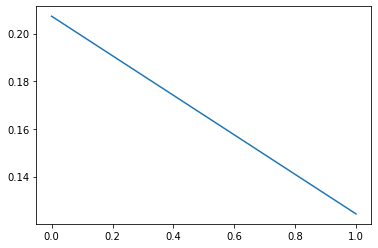

In [0]:
from sklearn.pipeline import Pipeline

# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(max_leaf_nodes = 16, n_estimators = 239, max_depth=736))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Explained variance
var = pipe.steps[1][1].explained_variance_ratio_
print(var)
plt.plot(var)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

In [0]:
# Bayesian optimization

from skopt import gp_minimize
resultados_bayesian = gp_minimize(treinar_modelo, space, n_calls=30, n_random_starts=20, random_state=42, verbose=0)

# Best parameters
print(resultados_bayesian.x)

# Score of the best model
print(resultados_bayesian.fun)

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[89, 57]
-0.9407327586206896


In [0]:
# The best model is:

best_rf = RandomForestClassifier(n_estimators=51, max_leaf_nodes=114)
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=114,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 5. ML Explainability

In [0]:
# Install library shap for understand the model
!pip install shap

     |████████████████████████████████| 266kB 2.9MB/s 
  Created wheel for shap: filename=shap-0.33.0-cp36-cp36m-linux_x86_64.whl size=382254 sha256=ad14a6303b478bec9162973938e37396e4868aa8d66417c96965a641c5ef1c6c
  Stored in directory: /root/.cache/pip/wheels/39/0f/88/a8124d43431284e10f263ffe449e119344c6145c3a165d186c
Successfully built shap


In [0]:
# Import library
import shap

# Create the objects to understand the model
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [0]:
# init js
shap.initjs()

# Force plot
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train.iloc[0,:])

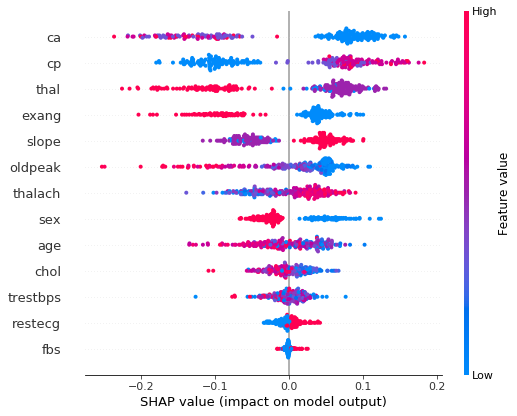

In [0]:
# summary plot - find the most important features

shap.initjs()
shap.summary_plot(shap_values[1], X_train)

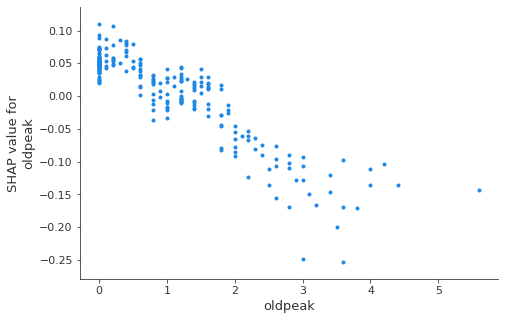

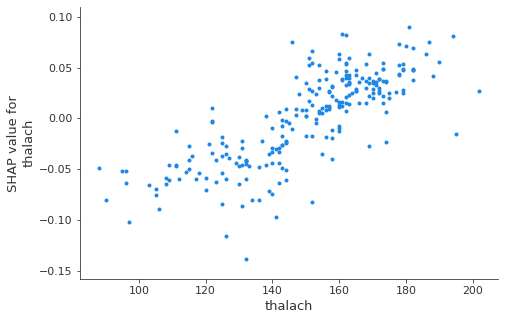

In [0]:
# dependence plot - select one feature to especfic analysis

shap.initjs()
shap.dependence_plot("oldpeak", shap_values[1], X_train, interaction_index=None)
shap.dependence_plot("thalach", shap_values[1], X_train, interaction_index=None)

In [0]:
# Testing others models

In [0]:
# Defining variables and split data

y = df_dummies["target"]
X = df_dummies.drop(labels=["target"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Data dimension
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 23) (61, 23) (242,) (61,)


In [0]:
# Using the best model + One Hot Encoding + All category variables:

# Bayesian optimization

from skopt import gp_minimize
space = [(2, 145), (50, 1000), (50, 1000)]
resultados_bayesian = gp_minimize(treinar_modelo, space, n_calls=30, n_random_starts=20, random_state=42, verbose=0)

# Best parameters
print(resultados_bayesian.x)

# Score of the best model
print(resultados_bayesian.fun)

[2, 68, 942]
-0.9342672413793104


In [43]:
# import Neural Network libraries

import keras
from keras.models import Sequential
from keras.layers import Dense

# Create an archteture layer

# Create a sequential model
model = Sequential()

# Create an input layer
model.add(Dense(128, input_shape=(13,)))

# Create a hidden layer
model.add(Dense(128, activation='sigmoid'))

# Create a hidden layer
model.add(Dense(64, activation='sigmoid'))

# Create a output layer
model.add(Dense(1, activation='sigmoid'))

# Compile my model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of model
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_52 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_53 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 65        
Total params: 26,625
Trainable params: 26,625
Non-trainable params: 0
_________________________________________________________________


In [44]:
# fit the model

# Train my model for 20 epochs
model.fit(X_train, y_train, epochs=20)

# Evaluate my model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:',accuracy)

Epoch 1/20
242/242 [==============================] - 1s 3ms/step - loss: 0.7168 - acc: 0.4752
Epoch 2/20
242/242 [==============================] - 0s 68us/step - loss: 0.6823 - acc: 0.5496
Epoch 3/20
242/242 [==============================] - 0s 72us/step - loss: 0.6757 - acc: 0.5496
Epoch 4/20
242/242 [==============================] - 0s 85us/step - loss: 0.6675 - acc: 0.5992
Epoch 5/20
242/242 [==============================] - 0s 77us/step - loss: 0.6681 - acc: 0.6240
Epoch 6/20
242/242 [==============================] - 0s 87us/step - loss: 0.6618 - acc: 0.6446
Epoch 7/20
242/242 [==============================] - 0s 101us/step - loss: 0.6546 - acc: 0.5992
Epoch 8/20
242/242 [==============================] - 0s 75us/step - loss: 0.6627 - acc: 0.6240
Epoch 9/20
242/242 [==============================] - 0s 70us/step - loss: 0.6632 - acc: 0.6612
Epoch 10/20
242/242 [==============================] - 0s 71us/step - loss: 0.6486 - acc: 0.6405
Epoch 11/20
242/242 [==================